# Introduction
![Houses](https://cdn1.imggmi.com/uploads/2019/1/8/a992b3e93a3eb40384afc638f99942cc-full.jpg)

In this project, I will put into practice some mdoels and a few methods of improving them.

I will also demonstrate techniques for cleaning, transofrming and selecting freatures.

The dataset I will use is housing data from the city of Ames, Iowa in the US. [Here](https://doi.org/10.1080/10691898.2011.11889627) is more information about the dataframe and [here](https://s3.amazonaws.com/dq-content/307/data_description.txt) is more information about the specific columns. 

## Setting up a pipeline of functions

To begin, I'll set up a pipeline of functions that will help me quickly iterate on different models.

![Pipeline Model](https://s3.amazonaws.com/dq-content/240/pipeline.svg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

# Reading the data into a dataframe for preliminary review
housing = pd.read_csv('AmesHousing.tsv', '\t')
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
# Importing scikit-learn classes
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

# Creating the necessary functions
def transform_features(df):
    '''
    A function that returns the train dataframe 
    '''
    return df

def select_features(df):
    '''
    A function that returns the 'Gr Liv Area' and 'SalePrice' columns 
    from the train dataframe
    '''
    cols = ['Gr Liv Area', 'SalePrice']
    return df[cols]

def train_and_test(df):
    '''
    A function that splits the dataset, trains
    and performs the test
    '''
    # Selecting the first 1460 rows from the dataset as train and the remainder as test
    train = df.iloc[:1460, :]
    test = df.iloc[1460:, :] 
    
    # Selecting numeric columns except for SalePrice from the dataframe returned by select_features()
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = train.select_dtypes(include=['integer', 'float'])
    
    # Fitting and predicting
    features = numeric_train.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    
    # Evaluating and returning RMSE value
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    return rmse


In [3]:
# Testing the functions so far
transform_df = transform_features(housing)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

print(rmse)

57088.25161263909


## Updating Functions to Meet New Goals
At this stage, I want to accomplish the following:
* Handle missing values:
    * All columns:
        * Drop any with 5% or more missing values for now.
    * Text columns:
        * Drop any with 1 or more missing values for now.
    * Numerical columns:
        * For columns with missing values, fill in with the most common value in that column

In [4]:
# Step 1: All columns: Drop any with 5% or more missing values for now.
numerical_df = housing.select_dtypes(include=['integer', 'float'])
numerical_null = numerical_df.isnull().sum()
gt5_numerical_cols = numerical_null[numerical_null > (.05 * housing.shape[0])].index

housing = housing.drop(gt5_numerical_cols, axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          293

Based on the info printout, only two columns met the condition of more than 5% missing values.

In [5]:
# Step 2: Text columns: Drop any with 1 or more missing values for now
text_df = housing.select_dtypes(include=['object'])
text_null = text_df.isnull().sum()
gt1_text_cols = text_null[text_null >= 1].index

housing = housing.drop(gt1_text_cols, axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 64 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2930 non-null object
Exterior 1st       29

In [6]:
# Step 3: Numerical columns: Fill null values with the most common value in that column
num_missing = housing.select_dtypes(include=['integer', 'float']).isnull().sum()
num_miss_cts = num_missing[num_missing > 0].sort_values()
num_miss_cols = num_miss_cts.index

In [7]:
## Compute the most common value for each column in num_miss_cols
replacement_values_dict = housing[num_miss_cols].mode().to_dict(orient='records')[0]
replacement_values_dict

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [8]:
## Replace missing values.
housing = housing.fillna(replacement_values_dict)

In [9]:
## Verify that every column has 0 missing values
housing.isnull().sum().value_counts()

0    64
dtype: int64

## What New Features Can I Create?

Based on the columns list, there are a few changes that can be made that might improve the quality of the features in this set.

The 'Yr Sold' and the 'Year Add/Remod' columns don't tell us much on their own. Used together, however they can tell us two things:
- How many years the house took to sell after being built.
- How many years after the remodeling the house was sold.

I will create columns for that information. 

In [10]:
# Calculate the years between sale and origin
years_sold = housing['Yr Sold'] - housing['Year Built']

# Check for negatives
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [11]:
# Calculate the years between sale and remodeling
yrs_since_rm = housing['Yr Sold'] - housing['Year Remod/Add']

# Check for negatives
yrs_since_rm[yrs_since_rm < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [12]:
# Create the new columns
housing['Years Before Sale'] = years_sold
housing['Years Since Remod'] = yrs_since_rm

# Drop rows with negative values for the new columns
housing = housing.drop([2180, 1702, 2181], axis=0)

# Dropping original columsn
housing = housing.drop(['Yr Sold', 'Year Remod/Add'], axis=1)

In one of the last steps in this section, I will remove any columns that aren't useful for machine learning and any columns that leak data about the sale.

In [13]:
## Dropping columns that aren't useful for the machine learning process
housing = housing.drop(["PID", "Order"], axis=1)

## Dropping columns that leak info about the sale
housing = housing.drop(["Mo Sold", "Sale Condition", "Sale Type"], axis=1)

In [14]:
housing.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,212,34,0,0,0,0,0,189900,13,12


Lastly, I will implement all of the work done here in the transformation function. 

In [15]:
def transform_features(df):
    '''
    This function assesses and removes null values, 
    updates the feature set and removes unnecessary columns
    '''
    # Step 1 - Removing numerical columns with more than 5% missing values
    numerical_df = df.select_dtypes(include=['integer', 'float'])
    numerical_null = numerical_df.isnull().sum()
    gt5_numerical_cols = numerical_null[numerical_null > (.05 * df.shape[0])].index

    new_df = housing.drop(gt5_numerical_cols, axis=1)
    
    # Step 2 - Removing text columns that have one or more missing values
    text_df = new_df.select_dtypes(include=['object'])
    text_null = text_df.isnull().sum()
    gt1_text_cols = text_null[text_null >= 1].index

    new_df = df.drop(gt1_text_cols, axis=1)
    
    # Step 3 - Finding null numerical values and replacing them with the most common value
    num_missing = new_df.select_dtypes(include=['integer', 'float']).isnull().sum()
    num_miss_cts = num_missing[num_missing > 0].sort_values()
    num_miss_cols = num_miss_cts.index
    
    # Replacing null values
    replacement_values_dict = new_df[num_miss_cols].mode().to_dict(orient='records')[0]
    new_df = new_df.fillna(replacement_values_dict)

    # Creating new features and removing their old 'parent' columns
    years_sold = new_df['Yr Sold'] - new_df['Year Built']
    yrs_since_rm = new_df['Yr Sold'] - new_df['Year Remod/Add']
    
    # Create the new columns
    new_df['Years Before Sale'] = years_sold
    new_df['Years Since Remod'] = yrs_since_rm

    # Drop rows with negative values for the new columns
    new_df = new_df.drop([2180, 1702, 2181], axis=0)

    # Dropping original columsn
    new_df = new_df.drop(['Yr Sold', 'Year Remod/Add'], axis=1)
    
    ## Dropping columns that aren't useful for the machine learning process
    new_df = new_df.drop(["PID", "Order"], axis=1)

    ## Dropping columns that leak info about the sale
    new_df = new_df.drop(["Mo Sold", "Sale Condition", "Sale Type"], axis=1)
    
    return new_df

In [16]:
# Testing the functions (again!)
housing = pd.read_csv('AmesHousing.tsv', '\t')
transform_df = transform_features(housing)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

print(rmse)

55275.36731241307


## Feature Selection

The first step I will take toward figuring out with features are the strongest, is creating a correlation heatmap matrix that will allow me to identify the features that correlate well with the SalePrice column.

In [17]:
# Isolating the numerical feautres in the training dataset
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
abs_corr_coefs = numerical_df.corr()['SalePrice'].abs().sort_values()

abs_corr_coefs

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Year Built           0.558490
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Are

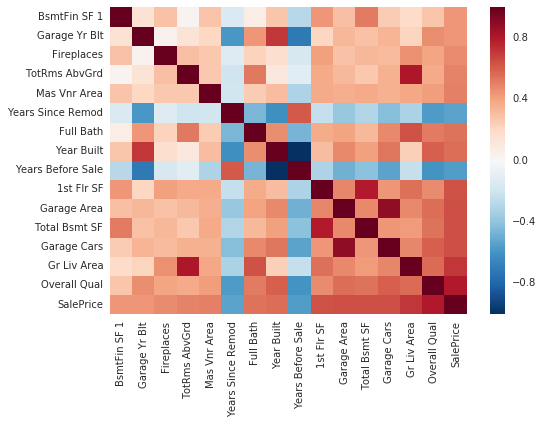

In [18]:
# Plotting the calculated coefficients in a heatmap
import seaborn as sns

strong_corrs = abs_corr_coefs[abs_corr_coefs > 0.4]
corrmat = numerical_df[strong_corrs.index].corr()
sns.heatmap(corrmat)

In [19]:
strong_corrs

BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Year Built           0.558490
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [20]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(strong_corrs.index, axis=1)

Which categorical columns would be good to keep?

In [23]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

- Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
- If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame.

In [24]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

## How many unique values in each categorical column?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [25]:
## Selecting just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
## Creating dummy cols and adding back to the dataframe
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)

The very last step is updating select_features() with this new work and set up the train and test. 

In [26]:
def transform_features(df):
    '''
    This function assesses and removes null values, 
    updates the feature set and removes unnecessary columns
    '''
    # Step 1 - Removing numerical columns with more than 5% missing values
    numerical_df = df.select_dtypes(include=['integer', 'float'])
    numerical_null = numerical_df.isnull().sum()
    gt5_numerical_cols = numerical_null[numerical_null > (.05 * df.shape[0])].index

    new_df = housing.drop(gt5_numerical_cols, axis=1)
    
    # Step 2 - Removing text columns that have one or more missing values
    text_df = new_df.select_dtypes(include=['object'])
    text_null = text_df.isnull().sum()
    gt1_text_cols = text_null[text_null >= 1].index

    new_df = df.drop(gt1_text_cols, axis=1)
    
    # Step 3 - Finding null numerical values and replacing them with the most common value
    num_missing = new_df.select_dtypes(include=['integer', 'float']).isnull().sum()
    num_miss_cts = num_missing[num_missing > 0].sort_values()
    num_miss_cols = num_miss_cts.index
    
    # Replacing null values
    replacement_values_dict = new_df[num_miss_cols].mode().to_dict(orient='records')[0]
    new_df = new_df.fillna(replacement_values_dict)

    # Creating new features and removing their old 'parent' columns
    years_sold = new_df['Yr Sold'] - new_df['Year Built']
    yrs_since_rm = new_df['Yr Sold'] - new_df['Year Remod/Add']
    
    # Create the new columns
    new_df['Years Before Sale'] = years_sold
    new_df['Years Since Remod'] = yrs_since_rm

    # Drop rows with negative values for the new columns
    new_df = new_df.drop([2180, 1702, 2181], axis=0)

    # Dropping original columsn
    new_df = new_df.drop(['Yr Sold', 'Year Remod/Add'], axis=1)
    
    ## Dropping columns that aren't useful for the machine learning process
    new_df = new_df.drop(["PID", "Order"], axis=1)

    ## Dropping columns that leak info about the sale
    new_df = new_df.drop(["Mo Sold", "Sale Condition", "Sale Type"], axis=1)
    
    return new_df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        lr.fit(fold_one[features], fold_one["SalePrice"])
        predictions_one = lr.predict(fold_two[features])        
        
        mse_one = mean_squared_error(fold_two["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(fold_two[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

[26778.17766293513, 27514.228778001394, 25637.78941901963, 37292.300080728295]


29305.62398517111